<a href="https://colab.research.google.com/github/pasinduSudesh/ALHelper/blob/master/PumpItUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [628]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold,train_test_split,KFold
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
# from collections import Counter
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [629]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [630]:
train_set_values = pd.read_csv('/content/drive/My Drive/Sem7_ACA/Machine Learning/DataDriven | Pump it Up/Data/trainingSet_Values.csv')
train_set_labels = pd.read_csv('/content/drive/My Drive/Sem7_ACA/Machine Learning/DataDriven | Pump it Up/Data/trainingSet_Labels.csv')
test_set_values = pd.read_csv('/content/drive/My Drive/Sem7_ACA/Machine Learning/DataDriven | Pump it Up/Data/testSet_Values.csv')

In [631]:
train_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [632]:
train_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [633]:
train_set_values.set_index('id',inplace=True)
train_set_values.head()


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [634]:
train_set_labels.set_index('id', inplace=True)
train_set_labels.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [635]:
test_set_values.set_index('id', inplace=True)
test_set_values.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [636]:
# Join data and labels
data = pd.merge(train_set_values, train_set_labels, how = 'inner', left_index = True,right_index=True)
data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


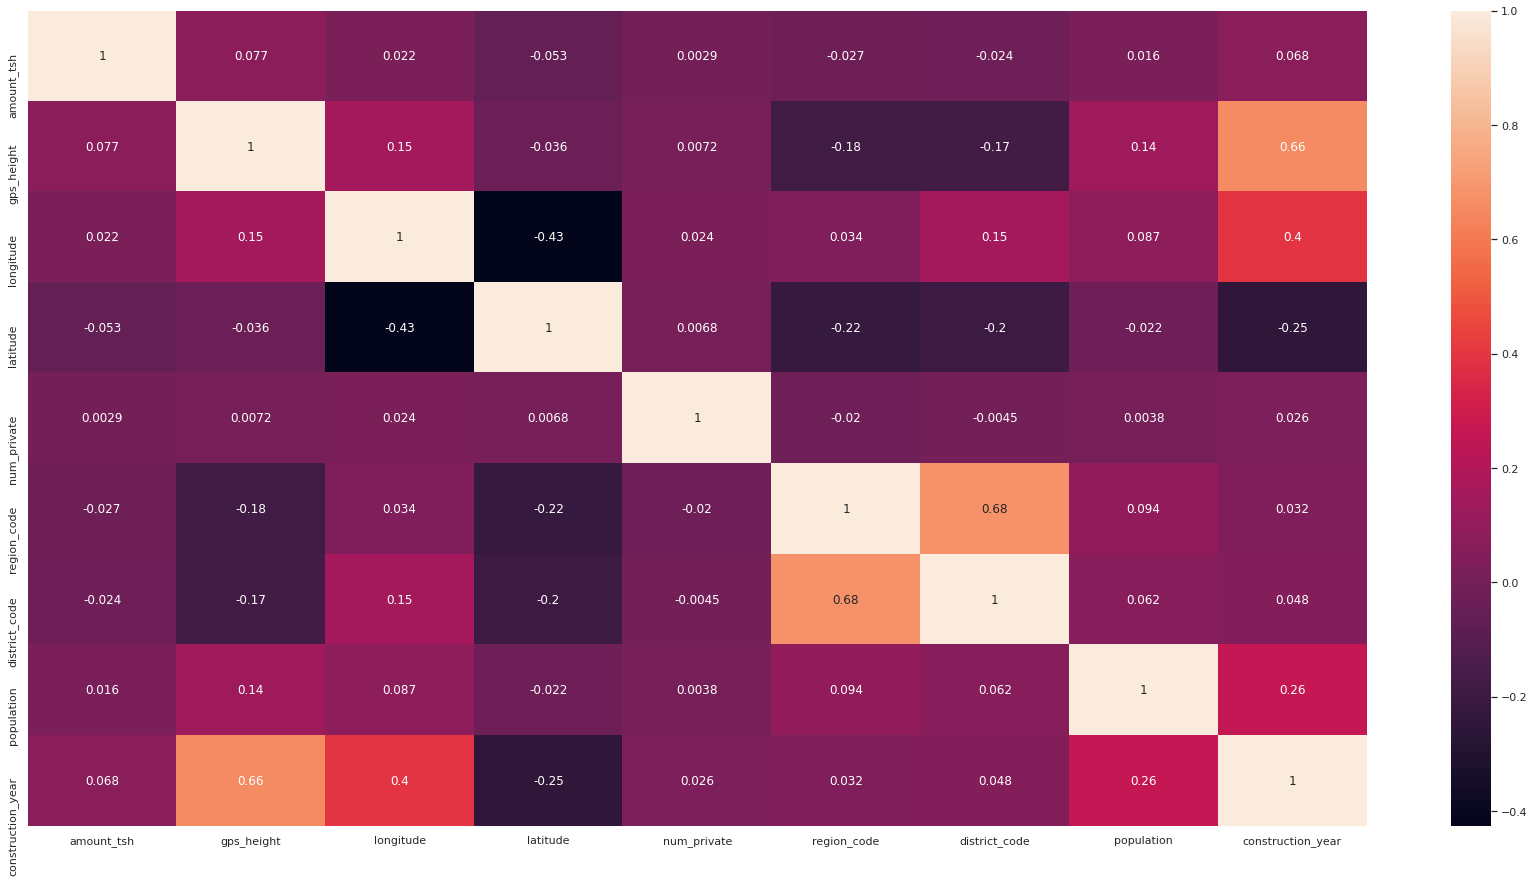

In [637]:
plt.figure(figsize=[30,15])
sns.heatmap(data.corr(), annot=True)

In [638]:
data.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [639]:
test_set_values.isna().sum()

amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_g

In [640]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [641]:
data['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [642]:
data['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [643]:
data['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [644]:
data.groupby(['source_class', 'source']).count()

amount_tsh  ...  status_group
source_class source                            ...              
groundwater  hand dtw                     874  ...           874
             machine dbh                11075  ...         11075
             shallow well               16824  ...         16824
             spring                     17021  ...         17021
surface      dam                          656  ...           656
             lake                         765  ...           765
             rainwater harvesting        2295  ...          2295
             river                       9612  ...          9612
unknown      other                        212  ...           212
             unknown                       66  ...            66

[10 rows x 38 columns]

In [645]:
# Drop source_class and source_type

# source_type and source have same data representation, so one of them can be droped
# souce can be keep it has more unique rows
# source_calss can be dropped, since source have more details

In [646]:

# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# source_type_train = label_encoder.fit_transform(data['source_type'])
# source_type_test = label_encoder.fit_transform(test_set_values['source_type'])

# data['source_type'] = source_type_train
# test_set_values['source_type'] = source_type_test

# genre_mappings = {index: label for index, label in 
#                   enumerate(gle.classes_)}
# genre_mappings

In [647]:
data['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [648]:
data['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [649]:
# Drop quantity_group
# Since quantity and quntity_group have same details one of them can be dropped 
data['quantity'], _ = data['quantity'].factorize(sort=True)
test_set_values['quantity'], _ = test_set_values['quantity'].factorize(sort=True)

In [650]:
data['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [651]:
data['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [652]:
# Drop payment_type
# Since payment and payment_type have same details one of them can be dropped 

In [653]:
data['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [654]:
data['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [655]:
data.groupby(['quality_group', 'water_quality']).count()

amount_tsh  ...  status_group
quality_group water_quality                   ...              
colored       coloured                   490  ...           490
fluoride      fluoride                   200  ...           200
              fluoride abandoned          17  ...            17
good          soft                     50818  ...         50818
milky         milky                      804  ...           804
salty         salty                     4856  ...          4856
              salty abandoned            339  ...           339
unknown       unknown                   1876  ...          1876

[8 rows x 38 columns]

In [656]:
# Drop quality_group
# Since water_quality provides more deatils than quality_group, quality_group can be removed

In [657]:
data['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [658]:
data['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [659]:
# Drop waterpoint_type_group
# Both waterpoint_type and waterpoint_type_group have same details, one of them can be droppped

In [660]:
data['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [661]:
data['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [662]:
data.groupby(['management_group', 'management']).count()

amount_tsh  ...  status_group
management_group management                    ...              
commercial       company                  685  ...           685
                 private operator        1971  ...          1971
                 trust                     78  ...            78
                 water authority          904  ...           904
other            other                    844  ...           844
                 other - school            99  ...            99
parastatal       parastatal              1768  ...          1768
unknown          unknown                  561  ...           561
user-group       vwc                    40507  ...         40507
                 water board             2933  ...          2933
                 wua                     2535  ...          2535
                 wug                     6515  ...          6515

[12 rows x 38 columns]

In [663]:
# Drop management_group
# Since values in management column are grouped into management_group, management_group can be dropped

In [664]:
data['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [665]:
data['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [666]:
data['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [667]:
data.groupby(['extraction_type_class', 'extraction_type']).count()

amount_tsh  ...  status_group
extraction_type_class extraction_type                        ...              
gravity               gravity                         26780  ...         26780
handpump              afridev                          1770  ...          1770
                      india mark ii                    2400  ...          2400
                      india mark iii                     98  ...            98
                      nira/tanira                      8154  ...          8154
                      other - mkulima/shinyanga           2  ...             2
                      other - play pump                  85  ...            85
                      other - swn 81                    229  ...           229
                      swn 80                           3670  ...          3670
                      walimi                             48  ...            48
motorpump             cemo                               90  ...            90
                      climax                             32  ...            32
                      mono                             2865  ...          2865
other                 other                            6430  ...          6430
rope pump             other - rope pump                 451  ...           451
submersible           ksb                              1415  ...          1415
                      submersible                      4764  ...          4764
wind-powered          windmill                          117  ...           117

[18 rows x 38 columns]

In [668]:
# Drop extraction_type_class and extraction_type_group
# extraction_type, extraction_type_group and extraction_type_class have same values
# 2 of them can be dropped

In [669]:
data['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [670]:
# Drop scheme_management
# It is same as management in above and also it has 3000 Nan values

In [671]:
data['gps_height'].value_counts()/data['gps_height'].count()

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
-20      0.000875
           ...   
 2285    0.000017
 2424    0.000017
 2552    0.000017
 2413    0.000017
 2385    0.000017
Name: gps_height, Length: 2428, dtype: float64

In [672]:
data['amount_tsh'].value_counts()/data['amount_tsh'].count()

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

In [673]:
data.loc[data['amount_tsh']==0]['status_group'].value_counts()

functional                 19706
non functional             18885
functional needs repair     3048
Name: status_group, dtype: int64

In [674]:
# Drop amount_tsh
# 70% of data has 0 and it is not depend on the output labels

In [675]:
# Fill Nan values with 'Unknown'
data['installer'] = data['installer'].fillna('Unknown')
test_set_values['installer'] = test_set_values['installer'].fillna('Unknown')

In [676]:
data['installer'].value_counts()

DWE                          17402
Unknown                       3658
Government                    1825
RWE                           1206
Commu                         1060
                             ...  
Teonas Wambura                   1
Deogra                           1
TAIPO                            1
Elius Chacha                     1
UMOJA DRILLING CONTRACTOR        1
Name: installer, Length: 2145, dtype: int64

In [677]:
data.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,quantity
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,1.325758
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,0.803750
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,1.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,1.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,2.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,4.000000


In [678]:
data.loc[data['longitude']==0]['latitude'].value_counts()

-2.000000e-08    1812
Name: latitude, dtype: int64

In [679]:
# So longitude=0 and langitude=-2e-08 are unknown values
# Have to fill with mean


In [680]:
data.loc[data['longitude']!=0]['longitude'].mean()

35.149669123888344

In [681]:
data.loc[data['longitude']!=0]['latitude'].mean()

-5.885572340514868

In [682]:
# Training Set
data['longitude'].replace(to_replace = 0 , value =35.15, inplace=True)
data['latitude'].replace(to_replace = -2.000000e-08 , value =-5.88, inplace=True)
# Test Set
test_set_values['longitude'].replace(to_replace = 0 , value =35.15, inplace=True)
test_set_values['latitude'].replace(to_replace = -2.000000e-08 , value =-5.88, inplace=True)

In [683]:
data.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,quantity
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,35.149679,-5.885402,0.474141,15.297003,5.629747,179.909983,1300.652475,1.325758
std,2997.574558,693.116350,2.567349,2.766686,12.236230,17.587406,9.633649,471.482176,951.620547,0.803750
min,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.354079,-8.540621,0.000000,5.000000,2.000000,0.000000,0.000000,1.000000
50%,0.000000,369.000000,35.150000,-5.440285,0.000000,12.000000,3.000000,25.000000,1986.000000,1.000000
75%,20.000000,1319.250000,37.178387,-3.398151,0.000000,17.000000,5.000000,215.000000,2004.000000,2.000000
max,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000,4.000000


In [684]:
data['wpt_name'].value_counts()

none                     3563
Shuleni                  1748
Zahanati                  830
Msikitini                 535
Kanisani                  323
                         ... 
Kwa Emmanuel Mapalala       1
Ikanyabayombi               1
Mnaz Mmoja                  1
Kwa Mniringa                1
Kwa Mashine Mayai           1
Name: wpt_name, Length: 37400, dtype: int64

In [685]:
# Since it has different string values, can be dropped the feature 

In [686]:
data['num_private'].value_counts()/data['num_private'].count()

0      0.987256
6      0.001364
1      0.001229
5      0.000774
8      0.000774
         ...   
180    0.000017
213    0.000017
23     0.000017
55     0.000017
94     0.000017
Name: num_private, Length: 65, dtype: float64

In [687]:
# Drop the feature because it has 98% of zeros

In [688]:
data['subvillage'].value_counts()

Madukani      508
Shuleni       506
Majengo       502
Kati          373
Mtakuja       262
             ... 
Kanina          1
Mwamitilwe      1
Mtafuteni       1
Matongo B       1
Murugina        1
Name: subvillage, Length: 19287, dtype: int64

In [689]:
data['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [690]:
data['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [691]:
# Drop subvillage because of it has 19287 different values. also region and region_code provide geographical infomation

In [692]:
data['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [693]:
data.loc[data['population']!=0]['population'].mean()

281.08716694284436

In [694]:
# Update the 0 values in population to mea value
data['population'].replace(to_replace = 0 , value = 281, inplace=True)
test_set_values['population'].replace(to_replace = 0 , value = 281, inplace=True)

In [695]:
data['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [696]:
data['public_meeting'].isna().sum()

3334

In [697]:
# Replace the Nan value with most frequent value and map TRUE->1 and FALSE->0
# Test Set
data['public_meeting'] = data['public_meeting'].fillna(True)
# data['public_meeting'] = data['public_meeting'].map({True:1, False:0})

# Test Set
test_set_values['public_meeting'] = test_set_values['public_meeting'].fillna(True)
# test_set_values['public_meeting'] = test_set_values['public_meeting'].map({True:1, False:0})

In [698]:
data['public_meeting'].value_counts()

True     54345
False     5055
Name: public_meeting, dtype: int64

In [699]:
data['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [700]:
# Drop recorded_by all vales are same

In [701]:
data['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [702]:
data['permit'].isna().sum()

3056

In [703]:
# Replace the Nan value with most frequent value and map TRUE->1 and FALSE->0
# Test Set
data['permit'] = data['permit'].fillna(True)
# data['permit'] = data['permit'].map({True:1, False:0})

# Test Set
test_set_values['permit'] = test_set_values['permit'].fillna(True)
# test_set_values['permit'] = test_set_values['permit'].map({True:1, False:0})

In [704]:
data['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [705]:
data.loc[data['construction_year']!=0]['construction_year'].mean()

1996.8146855857951

In [706]:
# Replace 0s with mean value
data['construction_year'].replace(to_replace = 0 , value = 1996, inplace = True)

In [707]:
data['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Bfwd                         1
Teonas Wambura               1
Igolola Community            1
College                      1
Mzee Mkungata                1
Name: funder, Length: 1897, dtype: int64

In [708]:
# Train set
data['funder'].fillna(value='Unknown', inplace=True)
data['funder'].replace(to_replace='0', value ='Unknown', inplace=True)

# Test set
test_set_values['funder'].fillna(value='Unknown', inplace=True)
test_set_values['funder'].replace(to_replace='0', value ='Unknown' , inplace=True)

In [709]:
data['subvillage'].value_counts().head(100).sum()

8781

In [710]:
# Drop subvillage because it has large unique value

In [711]:
data['scheme_name'].value_counts()

K                        682
None                     644
Borehole                 546
Chalinze wate            405
M                        400
                        ... 
BL Majengo                 1
Chemchem ya Wamweru        1
Chawim                     1
Kitomanga                  1
Kisamisi water scheme      1
Name: scheme_name, Length: 2696, dtype: int64

In [712]:
data['scheme_name'].value_counts().head(100).sum()

11756

In [713]:
data['scheme_name'].isna().sum()

28166

In [714]:
# Drop scheme_name it has lagre unique value and Nan

In [715]:
data.drop(['source_class', 'source_type', 'quantity_group', 'quality_group', 'waterpoint_type_group', 'management_group', 'extraction_type_class', 'extraction_type_group','scheme_management', 'payment_type', 'amount_tsh','wpt_name','num_private','subvillage','recorded_by', 'subvillage','scheme_name'], axis=1, inplace=True)
test_set_values.drop(['source_class', 'source_type', 'quantity_group', 'quality_group', 'waterpoint_type_group', 'management_group', 'extraction_type_class', 'extraction_type_group','scheme_management', 'payment_type','amount_tsh', 'wpt_name','num_private','subvillage','recorded_by','subvillage','scheme_name'], axis=1, inplace=True)
data.head()

,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,
69572,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,pay annually,soft,1,spring,communal standpipe,functional
8776,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,Natta,280,True,True,2010,gravity,wug,never pay,soft,2,rainwater harvesting,communal standpipe,functional
34310,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,pay per bucket,soft,1,dam,communal standpipe multiple,functional
67743,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,0,machine dbh,communal standpipe multiple,non functional
19728,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,Nyakasimbi,281,True,True,1996,gravity,other,never pay,soft,3,rainwater harvesting,communal standpipe,functional


In [716]:
data.isna().sum()

date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region               0
region_code          0
district_code        0
lga                  0
ward                 0
population           0
public_meeting       0
permit               0
construction_year    0
extraction_type      0
management           0
payment              0
water_quality        0
quantity             0
source               0
waterpoint_type      0
status_group         0
dtype: int64

In [717]:
# Split data_recorded into year month and date
date_recorded_train = data['date_recorded'].str.split("-", n = 2, expand = True).astype('int64')
date_recorded_test = test_set_values['date_recorded'].str.split("-", n = 2, expand = True).astype('int64')

data['recorded_year'] = date_recorded_train[0]
data['recorded_month'] = date_recorded_train[1]
data['recorded_date'] = date_recorded_train[2]
data.drop(['date_recorded'], axis=1, inplace=True)

test_set_values['recorded_year'] = date_recorded_test[0]
test_set_values['recorded_month'] = date_recorded_test[1]
test_set_values['recorded_date'] = date_recorded_test[2]
test_set_values.drop(['date_recorded'], axis=1, inplace=True)

data.head()

,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group,recorded_year,recorded_month,recorded_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,pay annually,soft,1,spring,communal standpipe,functional,2011,3,14
8776,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,Natta,280,True,True,2010,gravity,wug,never pay,soft,2,rainwater harvesting,communal standpipe,functional,2013,3,6
34310,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,pay per bucket,soft,1,dam,communal standpipe multiple,functional,2013,2,25
67743,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,0,machine dbh,communal standpipe multiple,non functional,2013,1,28
19728,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,Nyakasimbi,281,True,True,1996,gravity,other,never pay,soft,3,rainwater harvesting,communal standpipe,functional,2011,7,13


In [718]:
test_set_values.head()

,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,recorded_year,recorded_month,recorded_date
id,,,,,,,,,,,,,,,,,,,,,,,,,
50785,Dmdd,1996,DMDD,35.290799,-4.059696,Internal,Manyara,21,3,Mbulu,Bashay,321,True,True,2012,other,parastatal,never pay,soft,3,rainwater harvesting,other,2013,2,4
51630,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Pangani,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,True,2000,gravity,vwc,never pay,soft,2,spring,communal standpipe,2013,2,4
17168,Unknown,1567,Unknown,34.767863,-5.004344,Internal,Singida,13,2,Singida Rural,Puma,500,True,True,2010,other,vwc,never pay,soft,2,rainwater harvesting,other,2013,2,1
45559,Finn Water,267,FINN WATER,38.058046,-9.418672,Ruvuma / Southern Coast,Lindi,80,43,Liwale,Mkutano,250,True,True,1987,other,vwc,unknown,soft,0,shallow well,other,2013,1,22
49871,Bruder,1260,BRUDER,35.006123,-10.950412,Ruvuma / Southern Coast,Ruvuma,10,3,Mbinga,Mbinga Urban,60,True,True,2000,gravity,water board,pay monthly,soft,1,spring,communal standpipe,2013,3,27


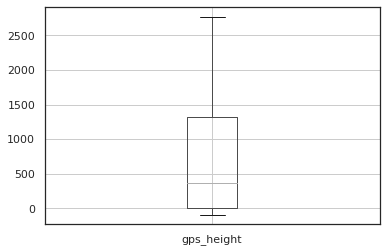

In [719]:
boxplot = data.boxplot(column=['gps_height'])
boxplot

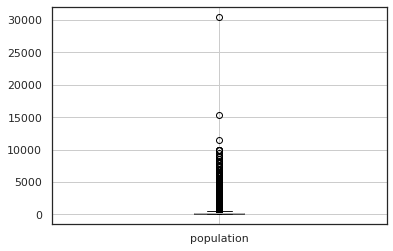

In [720]:
boxplot = data.boxplot(column=['population'])
boxplot

In [721]:
pip install category_encoders

In [722]:
from category_encoders import OneHotEncoder
import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [723]:
y_train = data.pop('status_group')


In [724]:
y_train = y_train.map({"functional": 2, "non functional":1, "functional needs repair":0})
y_train.head()

id
69572    2
8776     2
34310    2
67743    1
19728    2
Name: status_group, dtype: int64

In [725]:
X_train = data
X_train.head()
X_test = test_set_values

In [726]:
cat_cols = X_train.columns[X_train.dtypes == "object"].values
cat_cols

array(['funder', 'installer', 'basin', 'region', 'lga', 'ward',
       'extraction_type', 'management', 'payment', 'water_quality',
       'source', 'waterpoint_type'], dtype=object)

In [727]:
num_cols = X_train.columns[X_train.dtypes == "float64"].values.tolist() + X_train.columns[X_train.dtypes == "int64"].values.tolist() 
num_cols

['longitude',
 'latitude',
 'gps_height',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'quantity',
 'recorded_year',
 'recorded_month',
 'recorded_date']

In [728]:
bool_cols = X_train.columns[X_train.dtypes == "bool"].values
bool_cols

array(['public_meeting', 'permit'], dtype=object)

In [729]:
X_train['train'] = 1
X_train.head()

,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,recorded_year,recorded_month,recorded_date,train
id,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,pay annually,soft,1,spring,communal standpipe,2011,3,14,1
8776,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,Natta,280,True,True,2010,gravity,wug,never pay,soft,2,rainwater harvesting,communal standpipe,2013,3,6,1
34310,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,pay per bucket,soft,1,dam,communal standpipe multiple,2013,2,25,1
67743,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,0,machine dbh,communal standpipe multiple,2013,1,28,1
19728,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,Nyakasimbi,281,True,True,1996,gravity,other,never pay,soft,3,rainwater harvesting,communal standpipe,2011,7,13,1


In [730]:
X_test['train'] = 0
X_test.head()


,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,recorded_year,recorded_month,recorded_date,train
id,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,Dmdd,1996,DMDD,35.290799,-4.059696,Internal,Manyara,21,3,Mbulu,Bashay,321,True,True,2012,other,parastatal,never pay,soft,3,rainwater harvesting,other,2013,2,4,0
51630,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Pangani,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,True,2000,gravity,vwc,never pay,soft,2,spring,communal standpipe,2013,2,4,0
17168,Unknown,1567,Unknown,34.767863,-5.004344,Internal,Singida,13,2,Singida Rural,Puma,500,True,True,2010,other,vwc,never pay,soft,2,rainwater harvesting,other,2013,2,1,0
45559,Finn Water,267,FINN WATER,38.058046,-9.418672,Ruvuma / Southern Coast,Lindi,80,43,Liwale,Mkutano,250,True,True,1987,other,vwc,unknown,soft,0,shallow well,other,2013,1,22,0
49871,Bruder,1260,BRUDER,35.006123,-10.950412,Ruvuma / Southern Coast,Ruvuma,10,3,Mbinga,Mbinga Urban,60,True,True,2000,gravity,water board,pay monthly,soft,1,spring,communal standpipe,2013,3,27,0


In [731]:
newdata = X_train.append(X_test)
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 69572 to 68707
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   funder             74250 non-null  object 
 1   gps_height         74250 non-null  int64  
 2   installer          74250 non-null  object 
 3   longitude          74250 non-null  float64
 4   latitude           74250 non-null  float64
 5   basin              74250 non-null  object 
 6   region             74250 non-null  object 
 7   region_code        74250 non-null  int64  
 8   district_code      74250 non-null  int64  
 9   lga                74250 non-null  object 
 10  ward               74250 non-null  object 
 11  population         74250 non-null  int64  
 12  public_meeting     74250 non-null  bool   
 13  permit             74250 non-null  bool   
 14  construction_year  74250 non-null  int64  
 15  extraction_type    74250 non-null  object 
 16  management        

In [732]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
  gle = LabelEncoder()
  print(col)
  newdata[col] = gle.fit_transform(newdata[col])

for col in bool_cols:
  newdata[col] = newdata[col].astype(int)

funder
installer
basin
region
lga
ward
extraction_type
management
payment
water_quality
source
waterpoint_type


In [733]:
newdata.head()

,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,recorded_year,recorded_month,recorded_date,train
id,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,1547,1390,1706,34.938093,-9.856322,1,3,11,5,51,1429,109,1,0,1999,3,7,2,6,1,8,1,2011,3,14,1
8776,521,1399,610,34.698766,-2.147466,4,9,20,2,103,1581,280,1,1,2010,3,11,0,6,2,5,1,2013,3,6,1
34310,923,686,2296,37.460664,-3.821329,5,8,21,4,108,1629,250,1,1,2009,3,7,4,6,1,0,2,2013,2,25,1
67743,1960,263,2078,38.486161,-11.155298,7,12,90,63,87,1576,58,1,1,1986,14,7,0,6,0,3,2,2013,1,28,1
19728,19,0,133,31.130847,-1.825359,4,4,18,1,26,1692,281,1,1,1996,3,1,0,6,3,5,1,2011,7,13,1


In [734]:
X_train = newdata.loc[newdata['train'] == 1]

In [735]:
X_train.drop('train', axis=1, inplace=True)
X_train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,recorded_year,recorded_month,recorded_date
id,,,,,,,,,,,,,,,,,,,,,,,,,
69572,1547,1390,1706,34.938093,-9.856322,1,3,11,5,51,1429,109,1,0,1999,3,7,2,6,1,8,1,2011,3,14
8776,521,1399,610,34.698766,-2.147466,4,9,20,2,103,1581,280,1,1,2010,3,11,0,6,2,5,1,2013,3,6
34310,923,686,2296,37.460664,-3.821329,5,8,21,4,108,1629,250,1,1,2009,3,7,4,6,1,0,2,2013,2,25
67743,1960,263,2078,38.486161,-11.155298,7,12,90,63,87,1576,58,1,1,1986,14,7,0,6,0,3,2,2013,1,28
19728,19,0,133,31.130847,-1.825359,4,4,18,1,26,1692,281,1,1,1996,3,1,0,6,3,5,1,2011,7,13


In [736]:
X_test = newdata.loc[newdata['train'] == 0]

In [737]:
X_test.drop('train', axis=1, inplace=True)
X_test.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,recorded_year,recorded_month,recorded_date
id,,,,,,,,,,,,,,,,,,,,,,,,,
50785,344,1996,426,35.290799,-4.059696,0,8,21,3,63,18,321,1,1,2012,9,3,0,6,3,5,6,2013,2,4
51630,506,1569,442,36.656709,-3.309214,5,0,2,2,0,693,300,1,1,2000,3,7,0,6,2,8,1,2013,2,4
17168,1972,1567,2099,34.767863,-5.004344,0,18,13,2,109,1792,500,1,1,2010,9,7,0,6,2,5,6,2013,2,1
45559,442,267,545,38.058046,-9.418672,7,7,80,43,49,1283,250,1,1,1987,9,7,6,6,0,7,6,2013,1,22
49871,149,1260,164,35.006123,-10.950412,7,16,10,3,61,1157,60,1,1,2000,3,9,3,6,1,8,1,2013,3,27


In [738]:
def save_predictions(predicts, ids=X_test.index.values):

  csv_data = {
      'id': ids,
      'status_group': predicts
  }

  df = pd.DataFrame(csv_data)
  df['status_group'] = df['status_group'].map({2:"functional", 1: "non functional", 0: "functional needs repair"})
  df.head()

  df.to_csv('/content/drive/My Drive/Sem7_ACA/Machine Learning/DataDriven | Pump it Up/Data/SubmissionFormatn.csv', index=False)

## Final Model - XGB Classifier

XGB Classifier with parameters

In [739]:
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8476924977071183, gamma=0,
               learning_rate=0.04398583381298096, max_delta_step=0, max_depth=8,
               min_child_weight=1, missing=None, n_estimators=403, n_jobs=1,
               nthread=None, objective='multi:softprob', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.815773079363096, verbosity=1)


In [740]:
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8476924977071183, gamma=0,
              learning_rate=0.04398583381298096, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=403, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.815773079363096, verbosity=1)

In [741]:
predictions = xgbc.predict(X_test)



In [742]:
save_predictions(predictions)

## Model Selection

Random Forest Classifier


In [743]:
X = X_train
y = y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [744]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [745]:
y_pred = rf.predict(X_train)

y_pred_test = rf.predict(X_test)


In [746]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9246422558922559
TEST: 0.7971380471380471

Balanced Accuracy:
TRAIN: 0.9370946659156992
TEST: 0.7189127523932121


XGB Classifier

In [747]:
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8476924977071183, gamma=0,
               learning_rate=0.04398583381298096, max_delta_step=0, max_depth=8,
               min_child_weight=1, missing=None, n_estimators=403, n_jobs=1,
               nthread=None, objective='multi:softprob', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.815773079363096, verbosity=1)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8476924977071183, gamma=0,
              learning_rate=0.04398583381298096, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=403, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.815773079363096, verbosity=1)

In [748]:
y_pred = xgbc.predict(X_train)

y_pred_test = xgbc.predict(X_test)

In [749]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.875189393939394
TEST: 0.8107744107744108

Balanced Accuracy:
TRAIN: 0.7514386575387139
TEST: 0.6575779517414929


Start XBGC with Pipeline